In [1]:
from scipy.sparse import diags
import random
import numpy as np
import scipy as sc
import pandas as pd
import csv
import scipy.linalg as spl
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)
%matplotlib inline

import sys
sys.path.insert(0, '../python/')
from opt_utils import *
from grad_utils import *
from ks_utils import *
from simulation_utils import *
from cv_utils import *

# Generate synethic data

In [2]:
N = 10 # number of teams
T = 10 # number of seasons/rounds/years
tn = [10] * int(T * N * (N - 1)/2) # number of games between each pair of teams

### Gaussian Process

In [3]:
[alpha,r] = [1,1]
##### get beta here #####
random.seed(0)
np.random.seed(0)
beta_gp = beta_gaussian_process(N, T, mu_parameters = [0,1], cov_parameters = [alpha,r], mu_type = 'constant', cov_type = 'toeplitz')
game_matrix_list = get_game_matrix_list(N,T,tn,beta_gp)

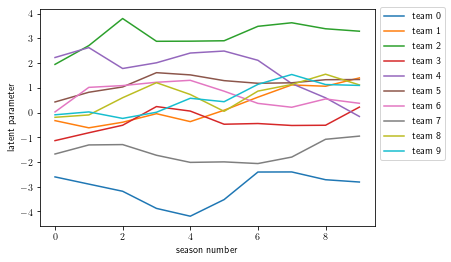

In [4]:
latent = beta_gp
for i in range(N):
    plt.plot(latent[:,i], label="team %d"%i)
plt.xlabel("season number")
plt.ylabel("latent parameter")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1.03, 1, 0))

In [5]:
data = game_matrix_list # shape: T*N*N

In [6]:
# true beta
beta_true = beta_gp + 0

In [7]:
beta_true.shape

(10, 10)

In [8]:
start_time = time.time()

random.seed(0)
np.random.seed(0)
objective_vanilla_bt, beta_vanilla_bt = gd_bt(data = data,verbose = True)

run_time = time.time() - start_time
print("--- %s seconds ---" % (run_time))


initial objective value: 3119.162313
1-th GD, objective value: 2068.891137
2-th GD, objective value: 1819.066503
3-th GD, objective value: 1761.695905
4-th GD, objective value: 1751.559733
5-th GD, objective value: 1750.915829
6-th GD, objective value: 1750.317488
7-th GD, objective value: 1750.240663
8-th GD, objective value: 1750.053923
9-th GD, objective value: 1750.027464
10-th GD, objective value: 1750.020666
11-th GD, objective value: 1750.017111
12-th GD, objective value: 1750.015176
13-th GD, objective value: 1750.009117
14-th GD, objective value: 1750.008321
15-th GD, objective value: 1750.007962
16-th GD, objective value: 1750.007155
17-th GD, objective value: 1750.006936
18-th GD, objective value: 1750.006853
19-th GD, objective value: 1750.006758
20-th GD, objective value: 1750.006728
21-th GD, objective value: 1750.006683
22-th GD, objective value: 1750.006671
23-th GD, objective value: 1750.006640
24-th GD, objective value: 1750.006632
25-th GD, objective value: 1750.0066

In [9]:
start_time = time.time()

random.seed(0)
np.random.seed(0)
ks_data = kernel_smooth(data,1/3 * T**(-1/5))
objective_pgd, beta_pgd = gd_bt(data = ks_data,verbose=True)

run_time = time.time() - start_time
print("--- %s seconds ---" % (run_time))


initial objective value: 3119.162313
1-th GD, objective value: 2141.966215
2-th GD, objective value: 1919.975871
3-th GD, objective value: 1878.245302
4-th GD, objective value: 1875.350931
5-th GD, objective value: 1874.725981
6-th GD, objective value: 1874.558831
7-th GD, objective value: 1874.418070
8-th GD, objective value: 1874.411337
9-th GD, objective value: 1874.408892
10-th GD, objective value: 1874.407709
11-th GD, objective value: 1874.407305
12-th GD, objective value: 1874.407139
13-th GD, objective value: 1874.407037
14-th GD, objective value: 1874.407001
15-th GD, objective value: 1874.406988
16-th GD, objective value: 1874.406975
17-th GD, objective value: 1874.406974
18-th GD, objective value: 1874.406973
19-th GD, objective value: 1874.406973
20-th GD, objective value: 1874.406973
21-th GD, objective value: 1874.406973
22-th GD, objective value: 1874.406973
23-th GD, objective value: 1874.406973
24-th GD, objective value: 1874.406973
25-th GD, objective value: 1874.4069

In [10]:
import time
def vBT_time(N,T,m):

#     N # number of teams
#     T # number of seasons/rounds/years
    tn = [m] * int(T * N * (N - 1)/2) # number of games between each pair of teams
    [alpha,r] = [1,1]
    ##### get beta here #####
    random.seed(0)
    np.random.seed(0)
    beta_gp = beta_gaussian_process(N, T, mu_parameters = [0,1], cov_parameters = [alpha,r], mu_type = 'constant', cov_type = 'toeplitz')
    game_matrix_list = get_game_matrix_list(N,T,tn,beta_gp)

    data = game_matrix_list # shape: T*N*N
    beta_true = beta_gp + 0
    
    # vanilla BT

    start_time = time.time()

    random.seed(0)
    np.random.seed(0)
    objective_vanilla_bt, beta_vanilla_bt = gd_bt(data = data)
    
    run_time = time.time() - start_time
    print("--- %s seconds ---" % (run_time))
    return run_time


def DBT_time(N,T,m):
#     N # number of teams
#     T # number of seasons/rounds/years
    tn = [m] * int(T * N * (N - 1)/2) # number of games between each pair of teams
    [alpha,r] = [1,1]
    ##### get beta here #####
    random.seed(0)
    np.random.seed(0)
    beta_gp = beta_gaussian_process(N, T, mu_parameters = [0,1], cov_parameters = [alpha,r], mu_type = 'constant', cov_type = 'toeplitz')
    game_matrix_list = get_game_matrix_list(N,T,tn,beta_gp)

    data = game_matrix_list # shape: T*N*N
    beta_true = beta_gp + 0

    # kernel BT
    
    start_time = time.time()

    random.seed(0)
    np.random.seed(0)
    ks_data = kernel_smooth(data,1/3 * T**(-1/5))
    objective_pgd, beta_pgd = gd_bt(data = ks_data,verbose=False)

    run_time = time.time() - start_time
    print("--- %s seconds ---" % (run_time))
    return run_time


# 10 games each pair

In [11]:
time_list_N = [[],[]]
time_list_T = [[],[]]
time_list_NT = [[],[]]

N_list = [10,20,40,80,160,320,640,1280]
T_list = [10,20,40,80,160,320,640,1280]
NT_list = [10,20,30,40,50,60]

m = 10
for i in range(len(N_list)):
    time_list_N[0].append(vBT_time(N_list[i],10,m))
    time_list_T[0].append(vBT_time(10,T_list[i],m))
    
    time_list_N[1].append(DBT_time(N_list[i],10,m))
    time_list_T[1].append(DBT_time(10,T_list[i],m))
    
for i in range(len(NT_list)):
    time_list_NT[0].append(vBT_time(NT_list[i],NT_list[i],m))
    time_list_NT[1].append(DBT_time(NT_list[i],NT_list[i],m))

--- 0.150620698928833 seconds ---
--- 0.1435844898223877 seconds ---
--- 0.09774112701416016 seconds ---
--- 0.09574413299560547 seconds ---
--- 0.18054938316345215 seconds ---
--- 4.2927937507629395 seconds ---
--- 0.10970592498779297 seconds ---
--- 0.17963266372680664 seconds ---
--- 0.4338703155517578 seconds ---
--- 8.898766279220581 seconds ---
--- 0.27193260192871094 seconds ---
--- 0.4438190460205078 seconds ---
--- 0.6111056804656982 seconds ---
--- 17.115188121795654 seconds ---
--- 0.8168413639068604 seconds ---
--- 0.8048467636108398 seconds ---


C:\Users\liwan\Dropbox\Research\AISTAT2020\final\grad_utils.py:25: RuntimeWarning: overflow encountered in exp
  W = np.log(1 + np.exp(D))


--- 3.2387945652008057 seconds ---
--- 34.191628217697144 seconds ---
--- 4.111410856246948 seconds ---
--- 1.9437663555145264 seconds ---
--- 26.102338790893555 seconds ---
--- 72.38218212127686 seconds ---
--- 30.499414205551147 seconds ---
--- 6.703341007232666 seconds ---
--- 189.3311264514923 seconds ---
--- 136.81813836097717 seconds ---
--- 201.6965618133545 seconds ---
--- 15.889463663101196 seconds ---
--- 888.0208878517151 seconds ---
--- 291.89883279800415 seconds ---
--- 886.5415008068085 seconds ---
--- 56.12755513191223 seconds ---
--- 0.13463902473449707 seconds ---
--- 0.08477520942687988 seconds ---
--- 0.5574769973754883 seconds ---
--- 0.3570442199707031 seconds ---
--- 0.8028552532196045 seconds ---
--- 0.7140853404998779 seconds ---
--- 1.2114453315734863 seconds ---
--- 1.6044316291809082 seconds ---
--- 3.7228968143463135 seconds ---
--- 3.4027321338653564 seconds ---
--- 2.718981981277466 seconds ---
--- 6.330891847610474 seconds ---


In [12]:
time_list_N

[[0.150620698928833,
  0.18054938316345215,
  0.4338703155517578,
  0.6111056804656982,
  3.2387945652008057,
  26.102338790893555,
  189.3311264514923,
  888.0208878517151],
 [0.09774112701416016,
  0.10970592498779297,
  0.27193260192871094,
  0.8168413639068604,
  4.111410856246948,
  30.499414205551147,
  201.6965618133545,
  886.5415008068085]]

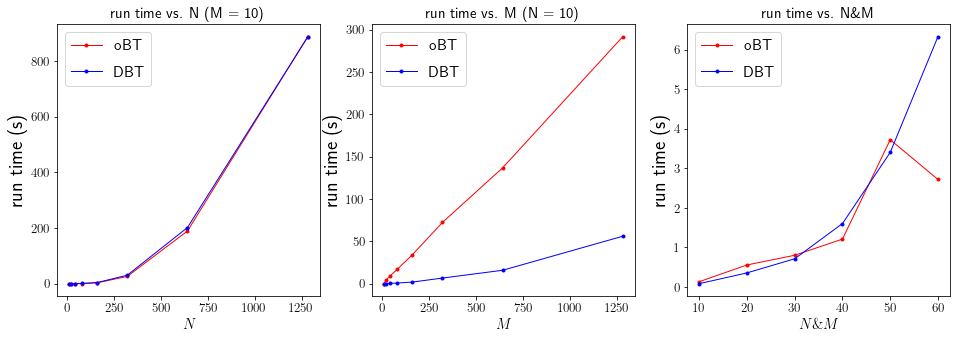

In [16]:
f = plt.figure(1, figsize = (16,5))

size_ylabel = 20
size_xlabel = 15
size_title = 15
size_tick = 13
size_legend = 15.4
font_title = "Times New Roman Bold"

random.seed(0)
np.random.seed(0)
color_list = ['red','blue']


ax = plt.subplot(131)
ax.plot(N_list,time_list_N[0],c=color_list[0],marker = '.',label = 'oBT',linewidth=1)
ax.plot(N_list,time_list_N[1],c=color_list[1],marker = '.',label = 'DBT',linewidth=1)
ax.tick_params(axis='both', which='major', labelsize=size_tick)
plt.title(r"run time vs. N (M = 10)",fontsize = size_title)
plt.xlabel(r"$N$",fontsize = size_xlabel); plt.ylabel(r"run time (s)",fontsize = size_ylabel,rotation = "vertical")
ax.legend(loc='upper left', fontsize = size_legend,labelspacing = 0.75,ncol = 1)
    
ax = plt.subplot(132)
ax.plot(T_list,time_list_T[0],c=color_list[0],marker = '.',label = 'oBT',linewidth=1)
ax.plot(T_list,time_list_T[1],c=color_list[1],marker = '.',label = 'DBT',linewidth=1)
ax.tick_params(axis='both', which='major', labelsize=size_tick)
plt.title(r"run time vs. M (N = 10)",fontsize = size_title)
plt.xlabel(r"$M$",fontsize = size_xlabel); plt.ylabel("run time (s)",fontsize = size_ylabel,rotation = "vertical")
ax.legend(loc='upper left', fontsize = size_legend,labelspacing = 0.75,ncol = 1)

ax = plt.subplot(133)
ax.plot(NT_list,time_list_NT[0],c=color_list[0],marker = '.',label = 'oBT',linewidth=1)
ax.plot(NT_list,time_list_NT[1],c=color_list[1],marker = '.',label = 'DBT',linewidth=1)
ax.tick_params(axis='both', which='major', labelsize=size_tick)
plt.title(r"run time vs. N\&M",fontsize = size_title)
plt.xlabel(r"$N\&M$",fontsize = size_xlabel); plt.ylabel(r"run time (s)",fontsize = size_ylabel,rotation = "vertical")
ax.legend(loc='upper left', fontsize = size_legend,labelspacing = 0.75,ncol = 1)


plt.subplots_adjust(hspace = 1)
plt.show()
f.savefig("compare_run_time.pdf", bbox_inches='tight')